# CAP 781 
# Regression Analysis - Linear Regression
## Implementation and Performance Analysis of Linear Regression, Multilinear Regression and Non-Linear Regression 

## Author

- **Name**: `Tanzeela Javid Kaloo` | `Assistant Professor`
- **Department**: Systems and Architecture
- **University**: Lovely Professional University
- **Email**: tanzeela.jvd@gmail.com

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# Advertisement Data Example

In a study the association between advertising and sales of a particular product is being investigated. The [advertising](https://www.statlearning.com/resources-second-edition) data set consists of `sales` of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `radio`, and `newspaper`.

In [2]:
#import required libraries
import pandas as pd
#import the data set in the .csv file into your current session
advertise_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col = 0)
#index_col = column(s) to use as the row labels
advertise_df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [ ]:
! pip install seaborn

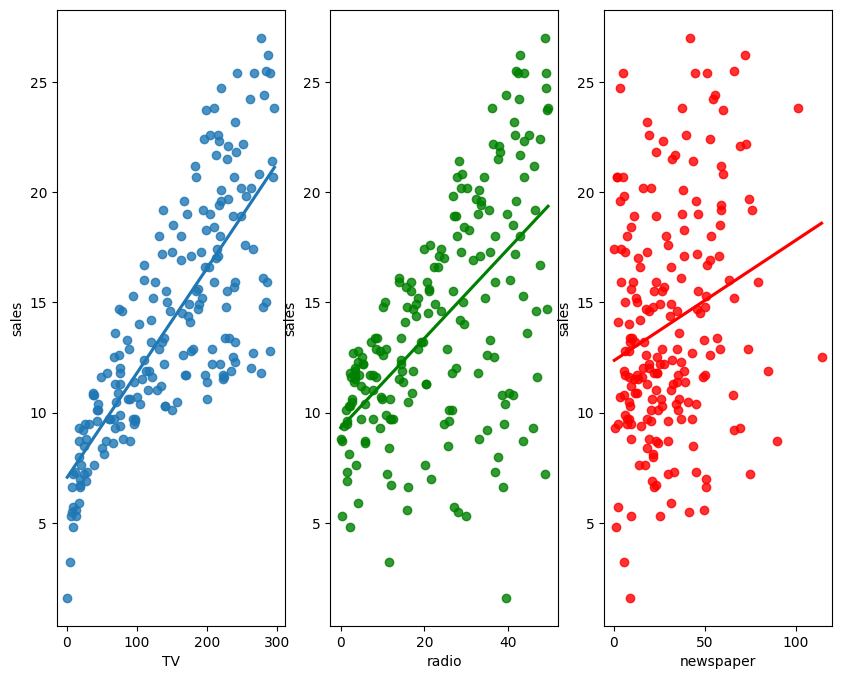

In [3]:
#import required libraries
from matplotlib import pyplot as plt
import seaborn as sns
#get a scatter plot of advertising budget spent in TV, radio, and newspaper and sales, respectively.
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(10, 8))
sns.regplot(ax=axes[0], x = advertise_df.TV, y = advertise_df.sales, ci = None)
sns.regplot(ax=axes[1], x = advertise_df.radio, y = advertise_df.sales, ci = None, color = 'green')
sns.regplot(ax=axes[2], x = advertise_df.newspaper, y = advertise_df.sales, ci = None, color = 'red');

- The plot displays **sales, in thousands of units**, as a function of **TV**, radio, and newspaper budgets, **in thousands of dollars**, for 200 different markets. 

- There exists a pretty strong linear relationship between advertising budget in TV and sales. 

- Since there exists approximately a linear relationthip between the TV and sales, let's build a simple linear regression through regressing sales (Y) on TV advertising (X) as follows:

$$sales_i = \beta_0 +  \beta_1 *TV_i + \epsilon_i \quad$$ for $i=1,2,\ldots,200$, where $\epsilon_i \sim N(0,\sigma^2)$.


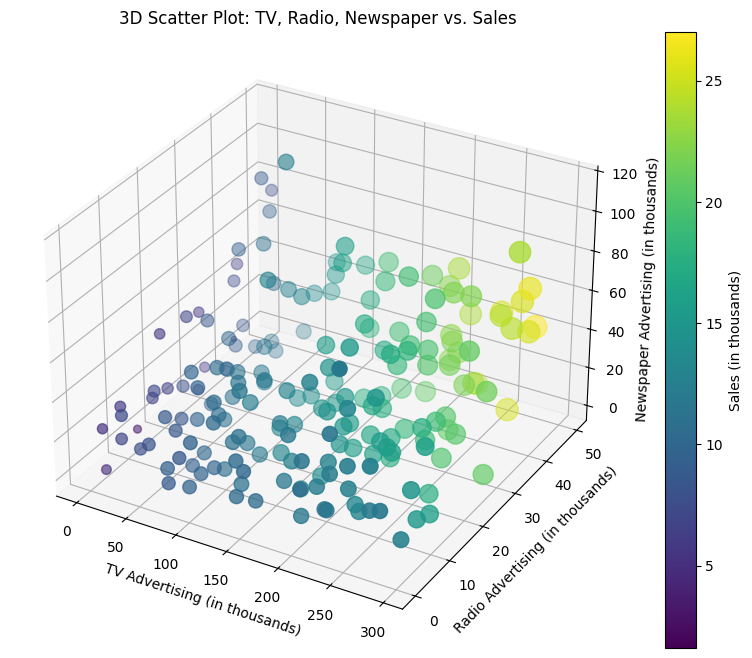

In [4]:
# Create the 3D scatter plot with point size based on sales
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with TV, radio, and newspaper on axes, and sales as the size
sc = ax.scatter(advertise_df['TV'], advertise_df['radio'], advertise_df['newspaper'], 
                c=advertise_df['sales'], s=advertise_df['sales']*10, cmap='viridis')

# Labels and title
ax.set_xlabel('TV Advertising (in thousands)')
ax.set_ylabel('Radio Advertising (in thousands)')
ax.set_zlabel('Newspaper Advertising (in thousands)')
ax.set_title('3D Scatter Plot: TV, Radio, Newspaper vs. Sales')

# Color bar for sales values
fig.colorbar(sc, label='Sales (in thousands)')

plt.show()


In [7]:
import statsmodels.api as sm

# define predictor and response
X = advertise_df.TV
Y = advertise_df.sales

# Add the intercept to the design matrix
X = sm.add_constant(X) 

#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit.html
#statsmodels.regression.linear_model.OLS.fit
#Describe model
model = sm.OLS(Y, X) 
#Fit model and return results object
results = model.fit() 
#https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults
#Based on the results, get predictions
#predictions = results.predict(X) 
#Get the results summary
print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.47e-42
Time:                        15:26:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

# Interpretation of the output

- The fitted regression line is:

  $$\widehat{sales}_i=7.0326 + (0.0475*TV_i).$$
  


In [8]:
#fit three different SLR
import statsmodels.api as sm

#Describe models
results_tv = sm.OLS(advertise_df[["sales"]], advertise_df[["TV"]].assign(intercept=1)).fit()  #fit method returns another class named RegressionResults
results_radio = sm.OLS(advertise_df[["sales"]], advertise_df[["radio"]].assign(intercept=1)).fit()
results_news = sm.OLS(advertise_df[["sales"]], advertise_df[["newspaper"]].assign(intercept=1)).fit()

In [9]:
#Get the results summary
print_model_radio = results_radio.summary()
print(print_model_radio)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           4.35e-19
Time:                        15:26:02   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radio          0.2025      0.020      9.921      0.0

In [10]:
#Get the results summary
print_model_news = results_news.summary()
print(print_model_news)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 17 Jan 2025   Prob (F-statistic):            0.00115
Time:                        15:26:03   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
newspaper      0.0547      0.017      3.300      0.0

## Multiple Linear Regression Analysis

- One problem associated with fitting seperate simple linear regression model for each predictor is that it is not clear that how to **make a single prediction of sales given the three advertising media budgets**. 
- On the other hand, each of the three regression equations **ignores the other two media** forming estimates for the regression coefficients.
- A better approach would be to fit a multiple linear regression to sales with three predictors such as:

$$sales_i = \beta_0 +  \beta_1 *TV_i + \beta_2 * radio_i + \beta_3 *newspaper_i + \epsilon_i \quad$$ for $i=1,2,\ldots,200$, where $\epsilon_i \sim N(0,\sigma^2)$.

In [11]:
#Describe model
results_full = sm.OLS(advertise_df[["sales"]], advertise_df[["TV","radio","newspaper"]].assign(intercept=1)).fit()
#Get the results summary
print_model_full = results_full.summary()
print(print_model_full)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        15:26:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.0

In [12]:
#Alternatively, extract the table
results_full.summary2().tables[1] #this is a data frame with column names

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
TV,0.045765,0.001395,32.808624,1.509960e-81,0.043014,0.048516
radio,0.188530,0.008611,21.893496,1.505339e-54,0.171547,0.205513
newspaper,-0.001037,0.005871,-0.176715,8.599151e-01,-0.012616,0.010541
intercept,2.938889,0.311908,9.422288,1.267295e-17,2.323762,3.554016


# Interpretation of the output

- The fitted regression line is:


  

$$sales_i = \beta_0 +  \beta_1 *TV_i + \beta_2 * Radio_i + \beta_3 *Newspaper_i \quad$$

  $$\widehat{sales}_i=2.938889 + (0.045765*TV_i) + (0.188530*Radio_i) + (-0.001037*Newspaper_i).$$

In [13]:
#Based on the results, get predictions
predictions = results_full.predict(advertise_df[["TV","radio","newspaper"]].assign(intercept=1))
predictions = pd.DataFrame(predictions)
predictions.head(10)

,0
1,20.523974
2,12.337855
3,12.307671
4,17.597830
5,13.188672
6,12.478348
7,11.729760
8,12.122953
9,3.727341
10,12.550849


In [14]:
advertise_df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [18]:
#Based on the results, get predictions
predictions = results_full.predict(advertise_df[["TV","radio","newspaper"]].assign(intercept=1))
predictions = pd.DataFrame(predictions)
predictions.tail(10)

,0
191,12.489159
192,8.424019
193,4.466230
194,18.486958
195,16.495300
196,5.370342
197,8.165312
198,12.785921
199,23.767321
200,15.173196


In [15]:
advertise_df.tail(10)

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
192,75.5,10.8,6.0,9.9
193,17.2,4.1,31.6,5.9
194,166.8,42.0,3.6,19.6
195,149.7,35.6,6.0,17.3
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


## Reference

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2021). [An Introduction to Statistical Learning: With Applications in R](https://www.statlearning.com/). New York: Springer.

In [16]:
import session_info
session_info.show()